In [4]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load Data

In [5]:
# Read the data file
sal_data = pd.read_excel("Levels_Fyi_Salary_Data.xlsx")
sal_data.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,2017-06-10 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,2017-06-20 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [6]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                62642 non-null  datetime64[ns]
 1   company                  62637 non-null  object        
 2   level                    62523 non-null  object        
 3   title                    62642 non-null  object        
 4   totalyearlycompensation  62642 non-null  int64         
 5   location                 62642 non-null  object        
 6   yearsofexperience        62642 non-null  float64       
 7   yearsatcompany           62642 non-null  float64       
 8   tag                      61788 non-null  object        
 9   basesalary               62642 non-null  int64         
 10  stockgrantvalue          62642 non-null  float64       
 11  bonus                    62642 non-null  float64       
 12  gender                   43102 n

In [7]:
print("Total missing values:")
sal_data.isnull().sum().sum()

Total missing values:


115515

In [8]:
#Plot the data for each year
sal_data.timestamp = pd.to_datetime(sal_data.timestamp)
sal_data.timestamp
year = sal_data.timestamp.dt.year
year_counts = year.value_counts()
year_counts

2020    23946
2021    23427
2019    11189
2018     3895
2017      185
Name: timestamp, dtype: int64

In [9]:
import missingno as msno
#Plot the titles
def descriptive_analysis(df, allColsExists):
  fig, ax =plt.subplots(nrows = 8,ncols = 2, figsize = (20,50))

  sns.countplot(y='title', data = df, color = 'blue', ax = ax[0,0])
  
  # Plot the Education
  sns.countplot(x='Education',data = df, ax = ax[0,1])

  # Plot the location
  sns.countplot(y='location',data = df, ax=ax[1,0],
                order=df.location.value_counts().iloc[:10].index)
    
  #Plot the years of experience
  sns.histplot(x="yearsofexperience", bins=range(0,35), data=df, ax = ax[1,1]) 
    
  #Plot the years of experience
  sns.barplot(x=year_counts.index,y = year_counts.values, data=df, ax = ax[2,0]) 
    
  sns.scatterplot(y = sal_data.title , x= sal_data.totalyearlycompensation, ax=ax[2,1])

  sns.boxplot(data = df, x ='totalyearlycompensation', ax=ax[3,0])
  sns.boxplot(data = df, x ='yearsofexperience', ax=ax[3,1])
  sns.boxplot(data = df, x ='yearsofexperience', y ='totalyearlycompensation', ax=ax[4,0])
  if(allColsExists == True):  
   # Plot the Race
   sns.countplot(x='Race',data = df, ax = ax[4,1])
    
   # Plot the gender
   sns.countplot(x='gender',data = df, ax = ax[5,0])
    
   #Correlation Matrix and Heatmap
   sns.heatmap(df.corr(), annot=True, ax = ax[5,1]) 
    
   #sns.histplot(data=df.isna().melt(value_name="missing"), x="variable",hue="missing",multiple="fill", aspect=1.25, ax=[6,0]) 
   sns.heatmap(df.isna().transpose(),cmap="YlGnBu", cbar_kws={'label': 'Missing Data'}, ax = ax[6,0]) 
    
   #Heatmap of missing values
   msno.heatmap(sal_data, ax = ax[6,1]) 
    
   #faang = df.query("company in ('Facebook','Amazon','Apple','Netflix','Google') and title in ('Data Scientist','Software Engineer')  and yearsofexperience>4 and yearsofexperience<16and totalyearlycompensation < 1000")
                    
   #sns.violinplot(data=faang, palette="Set3", x ='company',hue='title', y='totalyearlycompensation',ax = ax[7,0])

   # Save the full figure...
   fig.savefig('full_figure_pre_cleaning.png') 
  else: 
   # Save the full figure...
   fig.savefig('full_figure_post_cleaning.png')
  

In [10]:
#import numpy as np

#sal_data['totalyearlycompensation'] = np.log1p(sal_data['totalyearlycompensation'])
#sns.histplot(x='totalyearlycompensation', data = sal_data, kde = True, bins= 20)



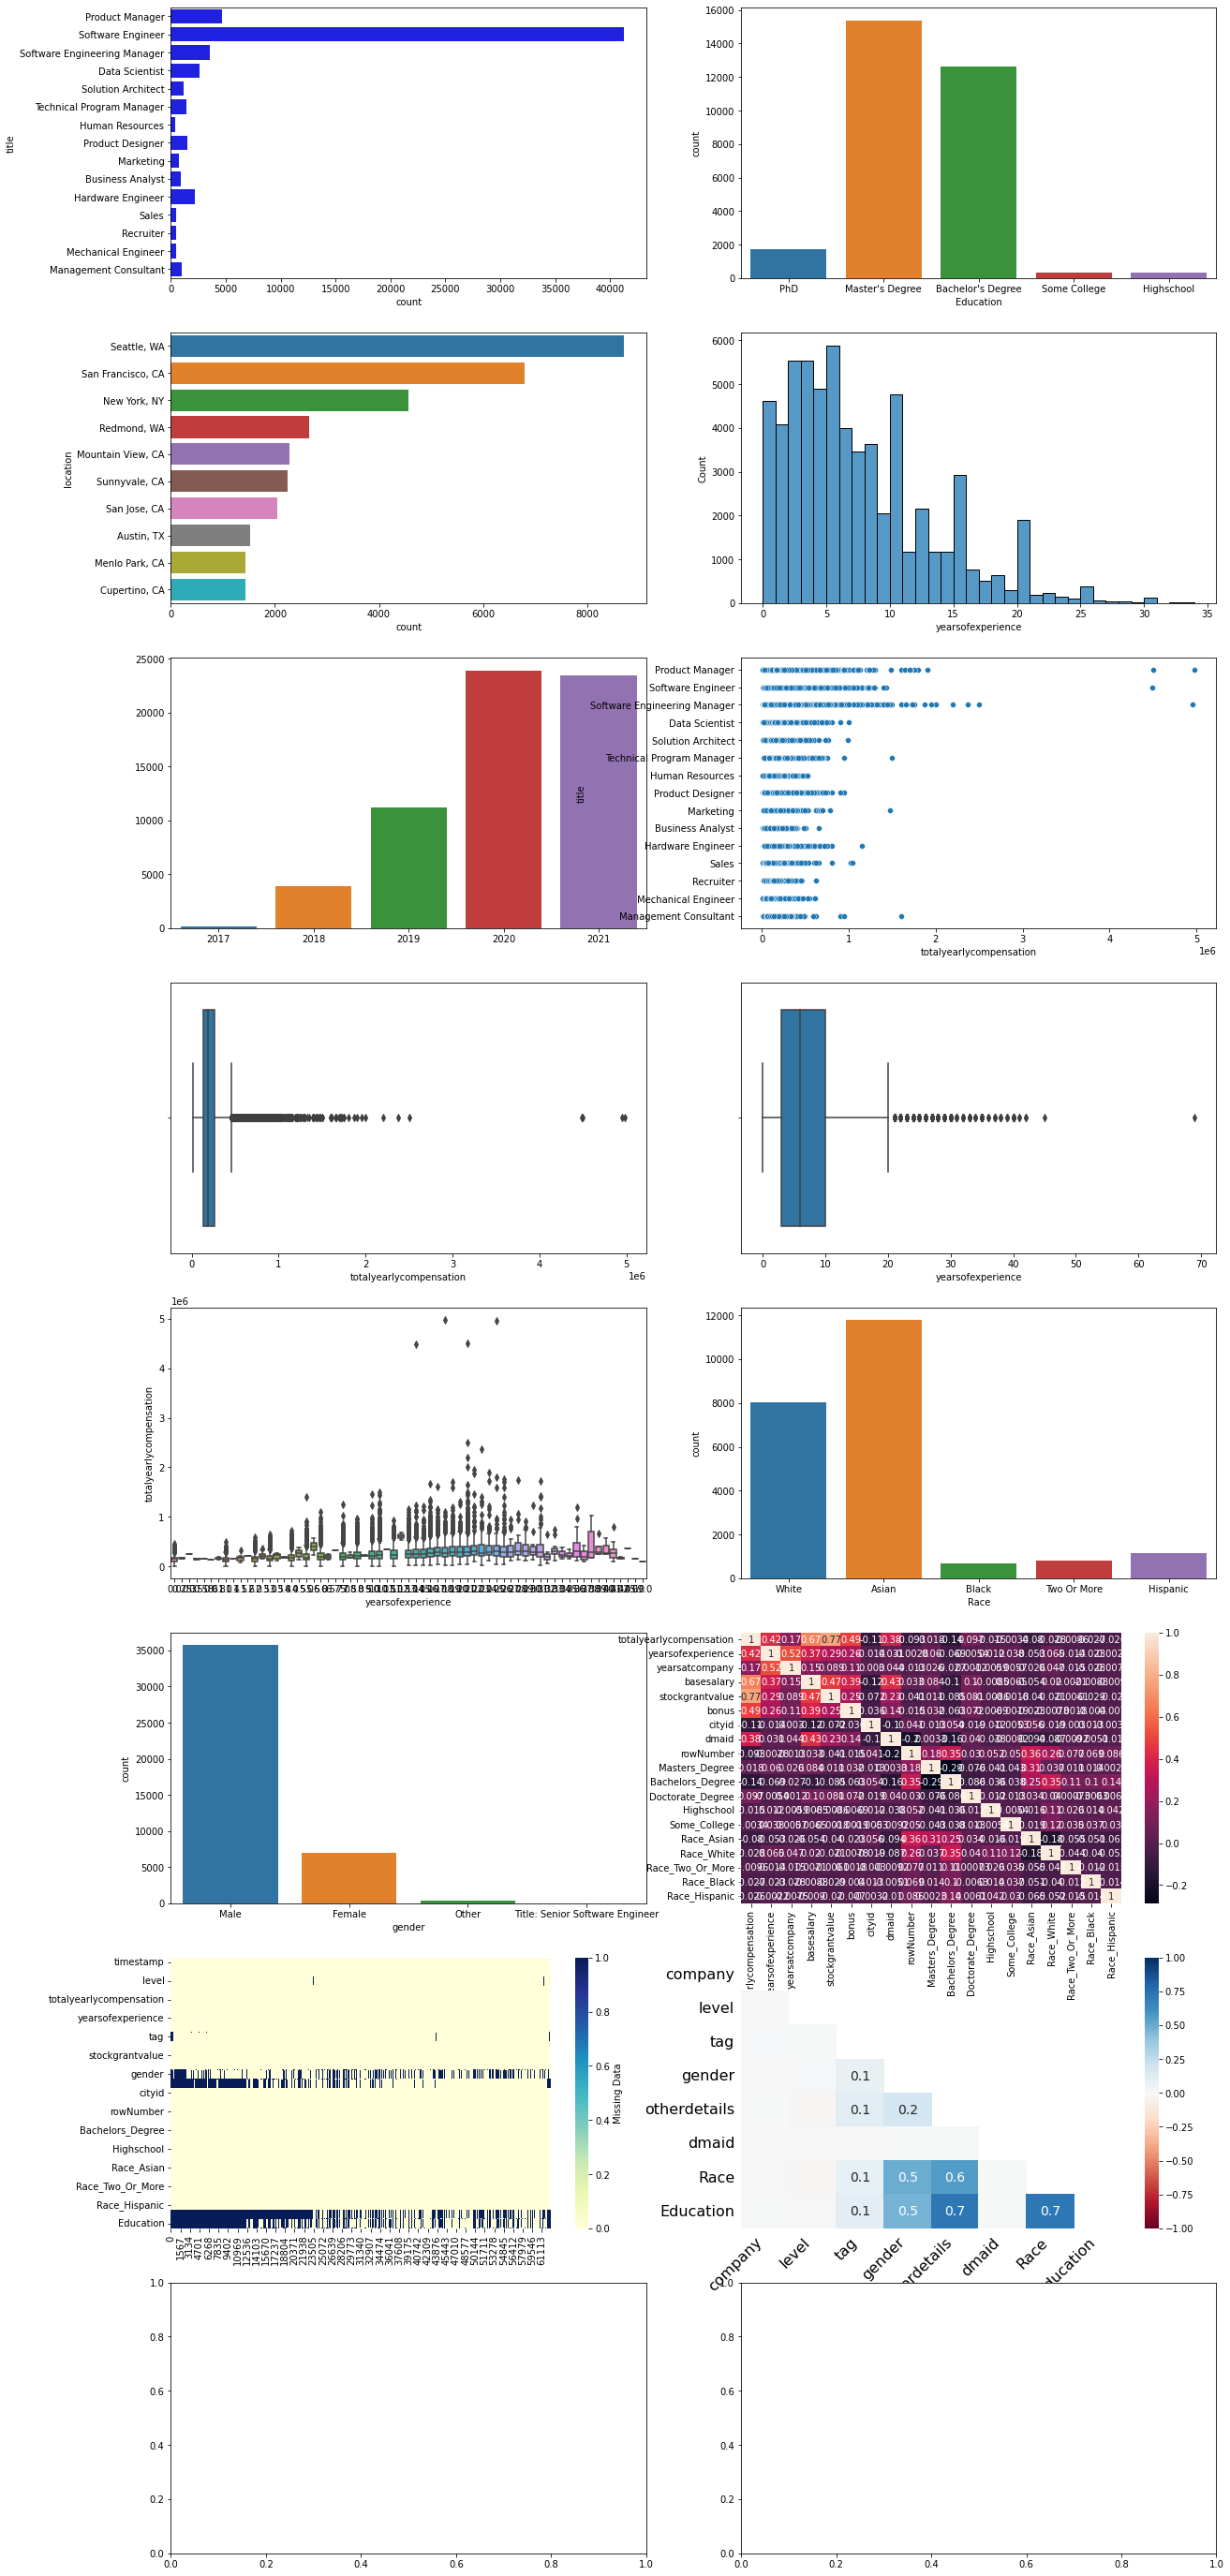

In [11]:
descriptive_analysis(sal_data, True)

In [12]:
#Percentage of missing values
missingcount= sal_data.isnull().sum()
round((missingcount/len(sal_data))*100,2)

timestamp                   0.00
company                     0.01
level                       0.19
title                       0.00
totalyearlycompensation     0.00
location                    0.00
yearsofexperience           0.00
yearsatcompany              0.00
tag                         1.36
basesalary                  0.00
stockgrantvalue             0.00
bonus                       0.00
gender                     31.19
otherdetails               35.93
cityid                      0.00
dmaid                       0.00
rowNumber                   0.00
Masters_Degree              0.00
Bachelors_Degree            0.00
Doctorate_Degree            0.00
Highschool                  0.00
Some_College                0.00
Race_Asian                  0.00
Race_White                  0.00
Race_Two_Or_More            0.00
Race_Black                  0.00
Race_Hispanic               0.00
Race                       64.20
Education                  51.52
dtype: float64

**************************************Data Cleaning**********************************
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled.

In [13]:
#Drop the unrelevant records from our dataset.
#i.e the records that are not part of the study
titles = ['Human Resources',
          'Management Consultant',
          'Marketing',
          'Mechanical Engineer',
          'Recruiter',
          'Sales'] 
sal_data_cleaned = sal_data[~sal_data["title"].isin(titles)]   
#inspect the row counts
sal_data_cleaned.count()


timestamp                  59190
company                    59185
level                      59085
title                      59190
totalyearlycompensation    59190
location                   59190
yearsofexperience          59190
yearsatcompany             59190
tag                        58350
basesalary                 59190
stockgrantvalue            59190
bonus                      59190
gender                     40994
otherdetails               37500
cityid                     59190
dmaid                      59188
rowNumber                  59190
Masters_Degree             59190
Bachelors_Degree           59190
Doctorate_Degree           59190
Highschool                 59190
Some_College               59190
Race_Asian                 59190
Race_White                 59190
Race_Two_Or_More           59190
Race_Black                 59190
Race_Hispanic              59190
Race                       20702
Education                  28321
dtype: int64

Remove the rows with missing values in fields 'company', 'level','totalyearlycompensation'
as they are the most relevant fields in our study

In [14]:
#Drop the unrelevant fields from our dataset.
sal_data_cleaned = sal_data_cleaned.drop(columns = 
                         ['gender', 'otherdetails','dmaid','rowNumber','Masters_Degree',
                          'Bachelors_Degree','Doctorate_Degree','Highschool','Some_College','Race_Asian',
                          'Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic','Race'])
sal_data_cleaned.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,cityid,Education
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,20000.0,10000.0,7392,NaN
1,2017-06-10 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,0.0,0.0,7419,NaN
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,0.0,0.0,11527,NaN
3,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,180000.0,35000.0,7472,NaN
4,2017-06-20 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,0.0,0.0,7322,NaN


Inspect the count of unique values in our dataset

In [15]:
sal_data_cleaned = sal_data_cleaned.dropna(subset=['company', 'level','totalyearlycompensation','Education'])

In [16]:
sal_data_cleaned['Education'].fillna('Unknown', inplace = True) 
sal_data_cleaned['Education'] = sal_data_cleaned['Education'].replace(['Some College'],'Highschool')
sal_data_cleaned['Education'].value_counts()
#sal_data_cleaned['title'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Master's Degree      14479
Bachelor's Degree    11513
PhD                   1647
Highschool             627
Name: Education, dtype: int64

In [17]:
def ConverttoUpper(df,field):
  distinct_values = pd.unique(df[field])
  print("count of distinct "+ field + " name before:" +str(len(distinct_values)))
  #not working
  #sal_data_cleaned['company'] = map(lambda x: str(x).upper(), sal_data_cleaned['company'])

  df[field] = df[field].str.upper()
  df[field]
    
  distinct_values = pd.unique(df[field])
  print("count of distinct company name after converting to upper:" +str(len(distinct_values)))
    
ConverttoUpper(sal_data_cleaned,'company')

count of distinct company name before:1353
count of distinct company name after converting to upper:1077


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [18]:
#ref : https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
import numpy as np
def IdentifyCorrelation(df, threshold):
    cor_matrix = df.corr().abs()
    print(cor_matrix)
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
    print(upper_tri)
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    print("\n*******Highly correlated fields***********"); 
    print(to_drop)
    #df1 = df.drop(df.columns[to_drop], axis=1)
    #print(df1.head())
    #return df1
#sal_data_cleaned = IdentifyCorrelation(sal_data_cleaned, 0.7) 

In [19]:
#from scipy.stats import chisquare
#chisquare(sal_data_cleaned)
#ref: https://pyshark.com/skewness-in-python/
#from scipy.stats import skew
#print(skew(sal_data_cleaned['totalyearlycompensation']))

In [20]:
def BinSalaryData(df, field):
    #define a new column as a placeholder for salary data
    newfield = field +"_bins"
    df[newfield] = 0
    print("defined a new field :" + newfield)
    #print the ranges
    print("the minimum value of " + field)
    print(min(df[field]))
    print("the maximum value of " + field)
    print(max(df[field]))
    
    #define ranges
    lowrange = df[field] <= 100000
    highrange = df[field] > 100000
        
    df.loc[lowrange,newfield]= 1 #low
    df.loc[highrange,newfield]= 2 #high
    
    #print the counts
    print(df[newfield].value_counts())
    
    # Plot the totalyearlycompensation bins
    sns.countplot(x='totalyearlycompensation_bins',data = df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


defined a new field :totalyearlycompensation_bins
the minimum value of totalyearlycompensation
10000
the maximum value of totalyearlycompensation
4980000
2    23720
1     4546
Name: totalyearlycompensation_bins, dtype: int64


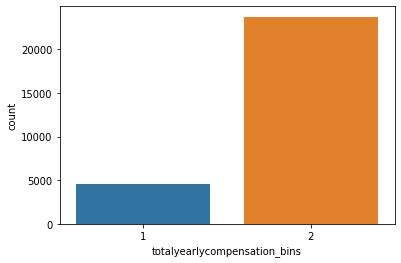

In [21]:
BinSalaryData(sal_data_cleaned,'totalyearlycompensation')

In [22]:
sal_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28266 entries, 46 to 61991
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     28266 non-null  datetime64[ns]
 1   company                       28266 non-null  object        
 2   level                         28266 non-null  object        
 3   title                         28266 non-null  object        
 4   totalyearlycompensation       28266 non-null  int64         
 5   location                      28266 non-null  object        
 6   yearsofexperience             28266 non-null  float64       
 7   yearsatcompany                28266 non-null  float64       
 8   tag                           28241 non-null  object        
 9   basesalary                    28266 non-null  int64         
 10  stockgrantvalue               28266 non-null  float64       
 11  bonus                      

**********Data Transformation and feature reduction***********
Encode the categorical data
Feature scaling via Normalization or Standardization
Dimensionality Reduction / Factor Analysis for factor reduction

In [23]:
thislist = ["company", "title","tag", "level","cityid","location","Education"]
for x in thislist:
  unique_values =  pd.unique(sal_data_cleaned[x])
  print("********************")
  print(x + ":" +str(len(unique_values)))
  print("********************")
  print(unique_values)
  print("\n")

********************
company:1077
********************
['SALESFORCE' 'FACEBOOK' 'CAPITAL ONE' ... 'PEGATRON' 'CARMAX' 'BUKALAPAK']


********************
title:9
********************
['Software Engineer' 'Data Scientist' 'Hardware Engineer'
 'Product Manager' 'Solution Architect' 'Software Engineering Manager'
 'Product Designer' 'Business Analyst' 'Technical Program Manager']


********************
tag:1571
********************
[nan 'ML / AI' 'Distributed Systems (Back-End)' ... 'Program Manager II'
 'Product Infra' 'DevInfra']


********************
level:1833
********************
['Lead MTS' 'E4' 'Senior Associate' ... 'Medior Software Engineer' 'Level'
 'Grade 2']


********************
cityid:802
********************
[ 7419  7300 40303 10182  7351  7158  7322 11109  7472 11039 11527  7416
  1182  7304 15900  7229  7392  7422  7427 10278  7434  7053  1317  8816
 11521 35795 12008 11470  6580  7277  7193  6924  7413 10965  8198  7813
 41948  8893  3488 28813  7438  6765 11412  1288 

In [24]:
tag_categories = sal_data_cleaned['tag'].unique()

print('tag categories are: \n',len(tag_categories),'\n')
ConverttoUpper(sal_data_cleaned,'tag')
for val in tag_categories:
    print(val)

tag_categories = sal_data_cleaned['tag'].unique()
print('tag categories are: \n',len(tag_categories),'\n')

tag categories are: 
 1571 

count of distinct tag name before:1571
count of distinct company name after converting to upper:1388
nan
ML / AI
Distributed Systems (Back-End)
Optimization
DevOps
Networking
Battery (SEG, HW Technology Org)
IC design
Data Center/ Control Systems
Android
DSP
Full Stack
Security
API Development (Back-End)
Engine C++
Semiconductor
Rotational Product Management
Hardware
Interaction Design
Testing (SDET)
System Software
Design
Windows
Embedded Systems
Verification
Processor Design
Package Registry
Firmware
Modeling
Finance
Data
sw
hardware
Product Management
Database Systems
Web Development (Front-End)
Data Engineering
Mobile (iOS + Android)
eCommerce
EDA
Presales
UX
Other
research
iOS
Site Reliability Engineering
Product Application
DS
Marketing
ASIC
Planner
Software driver
display
OS
aws
All platforms
design
Modem
casino
Analytics
Graphics
New Grad
Hardware development engineer
Data Eng
Product management
Government
Machine learning
Cloud Compute
RFIC
AV Robo

In [25]:
data_eng_roles = [
    'ML / AI',
    'AI',
    'AI/ML',
    'DATA',
    'DATA ENGINEERING',
    'ML/AI ENGINEERING (NOT MODEL DEVELOPMENT)',
    'FULL STACK, DATA ENGINEERING, ML',
    'DATA ANALYSIS',
    'DATA ANALYTICS',
    'ALGORITHMS',
    'DATA SCIENCE',
    'ALGORITHM',
    'ANALYTICS',
    'SYSTEMS/ML',
    'TENSORFLOW',
    'ALGORITHM PROTOTYPING',
    'ANALYTICS DATA WAREHOUSE',
    'DATA ANALYTICS / BUSINESS INTELLIGENCE',
    'ARTIFICIAL INTELLIGENCE',
    'NLP',
    'DATA ANALYTICS INFRA',
    'ALGORITHM MODELING',
    'ML',
    'ML, NLP',
    'ALGORITHM AND DRIVER DEVELOPMENT'
 ]

tag_implies_data_engineer = sal_data_cleaned["tag"].isin(data_eng_roles)
sal_data_cleaned[tag_implies_data_engineer].count()   

 
#inspect the row counts
#sal_data_cleaned.count()


timestamp                       3100
company                         3100
level                           3100
title                           3100
totalyearlycompensation         3100
location                        3100
yearsofexperience               3100
yearsatcompany                  3100
tag                             3100
basesalary                      3100
stockgrantvalue                 3100
bonus                           3100
cityid                          3100
Education                       3100
totalyearlycompensation_bins    3100
dtype: int64

In [26]:
title_implies_se = sal_data_cleaned["title"] != "Data Scientist"
sal_data_cleaned[title_implies_se].count()

timestamp                       26858
company                         26858
level                           26858
title                           26858
totalyearlycompensation         26858
location                        26858
yearsofexperience               26858
yearsatcompany                  26858
tag                             26833
basesalary                      26858
stockgrantvalue                 26858
bonus                           26858
cityid                          26858
Education                       26858
totalyearlycompensation_bins    26858
dtype: int64

In [27]:
sal_data_cleaned[title_implies_se & tag_implies_data_engineer]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,cityid,Education,totalyearlycompensation_bins
717,2018-08-09 12:01:10,FACEBOOK,E4,Software Engineer,239000,"Menlo Park, CA",4.0,0.0,ML / AI,140000,60000.0,39000.0,7300,PhD,2
6055,2019-04-25 23:33:26,APPLE,ICT3,Software Engineer,240000,"Cupertino, CA",3.0,3.0,ML / AI,150000,75000.0,15000.0,7158,PhD,2
7291,2019-06-15 08:24:43,EXXONMOBIL,23,Software Engineer,105000,"Houston, TX",2.0,0.0,ML / AI,105000,0.0,5000.0,11109,Master's Degree,2
8495,2019-07-08 17:27:15,GOOGLE,L4,Software Engineer,307000,"San Francisco, CA",3.0,0.0,ML / AI,160000,124000.0,24000.0,7419,PhD,2
9031,2019-07-23 16:44:12,GOOGLE,L4,Software Engineer,200000,"Mountain View, CA",0.0,0.0,ML / AI,143000,35000.0,22000.0,7322,PhD,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61751,2021-08-16 14:55:12,SHOPIFY,L6,Software Engineer,136000,"Toronto, ON, Canada",4.0,4.0,DATA,111000,25000.0,0.0,1206,Bachelor's Degree,2
61769,2021-08-16 16:48:23,QUALCOMM,Engineer,Software Engineer,125000,"San Diego, CA",0.0,0.0,ML / AI,103000,13000.0,8000.0,7416,Master's Degree,2
61799,2021-08-16 21:37:11,INTEL,Grade 5,Software Engineer,195000,"Santa Clara, CA",1.0,0.0,ML / AI,125000,33000.0,37000.0,7434,Master's Degree,2
61816,2021-08-17 01:45:21,MOTIONAL,L4,Software Engineer,144000,"Pasir Ris, SG, Singapore",5.0,2.0,ML / AI,114000,13000.0,17000.0,16802,PhD,2


In [28]:
sal_data_cleaned.loc[(title_implies_se & tag_implies_data_engineer),'title']='Data Scientist'

In [29]:
sal_data_cleaned[tag_implies_data_engineer].title.unique()
sal_data_cleaned['title'].value_counts()

Software Engineer               17340
Data Scientist                   3724
Product Manager                  2093
Software Engineering Manager     1347
Hardware Engineer                1275
Product Designer                  777
Technical Program Manager         772
Business Analyst                  476
Solution Architect                462
Name: title, dtype: int64

In [30]:
company_amzn = [
    'Amazon.com',
    'Aws',
    'AWS',
    'Amazon web services',
    'Amazon Web Services',
    'AMAZON',
    'AMazon',
    'Amazon',
    'amazon'
 ]

company_implies_company_amzn = sal_data_cleaned["company"].isin(company_amzn)
sal_data_cleaned[company_implies_company_amzn].count()   

timestamp                       3507
company                         3507
level                           3507
title                           3507
totalyearlycompensation         3507
location                        3507
yearsofexperience               3507
yearsatcompany                  3507
tag                             3503
basesalary                      3507
stockgrantvalue                 3507
bonus                           3507
cityid                          3507
Education                       3507
totalyearlycompensation_bins    3507
dtype: int64

In [31]:
sal_data_cleaned.loc[(company_implies_company_amzn),'company']='Amazon'

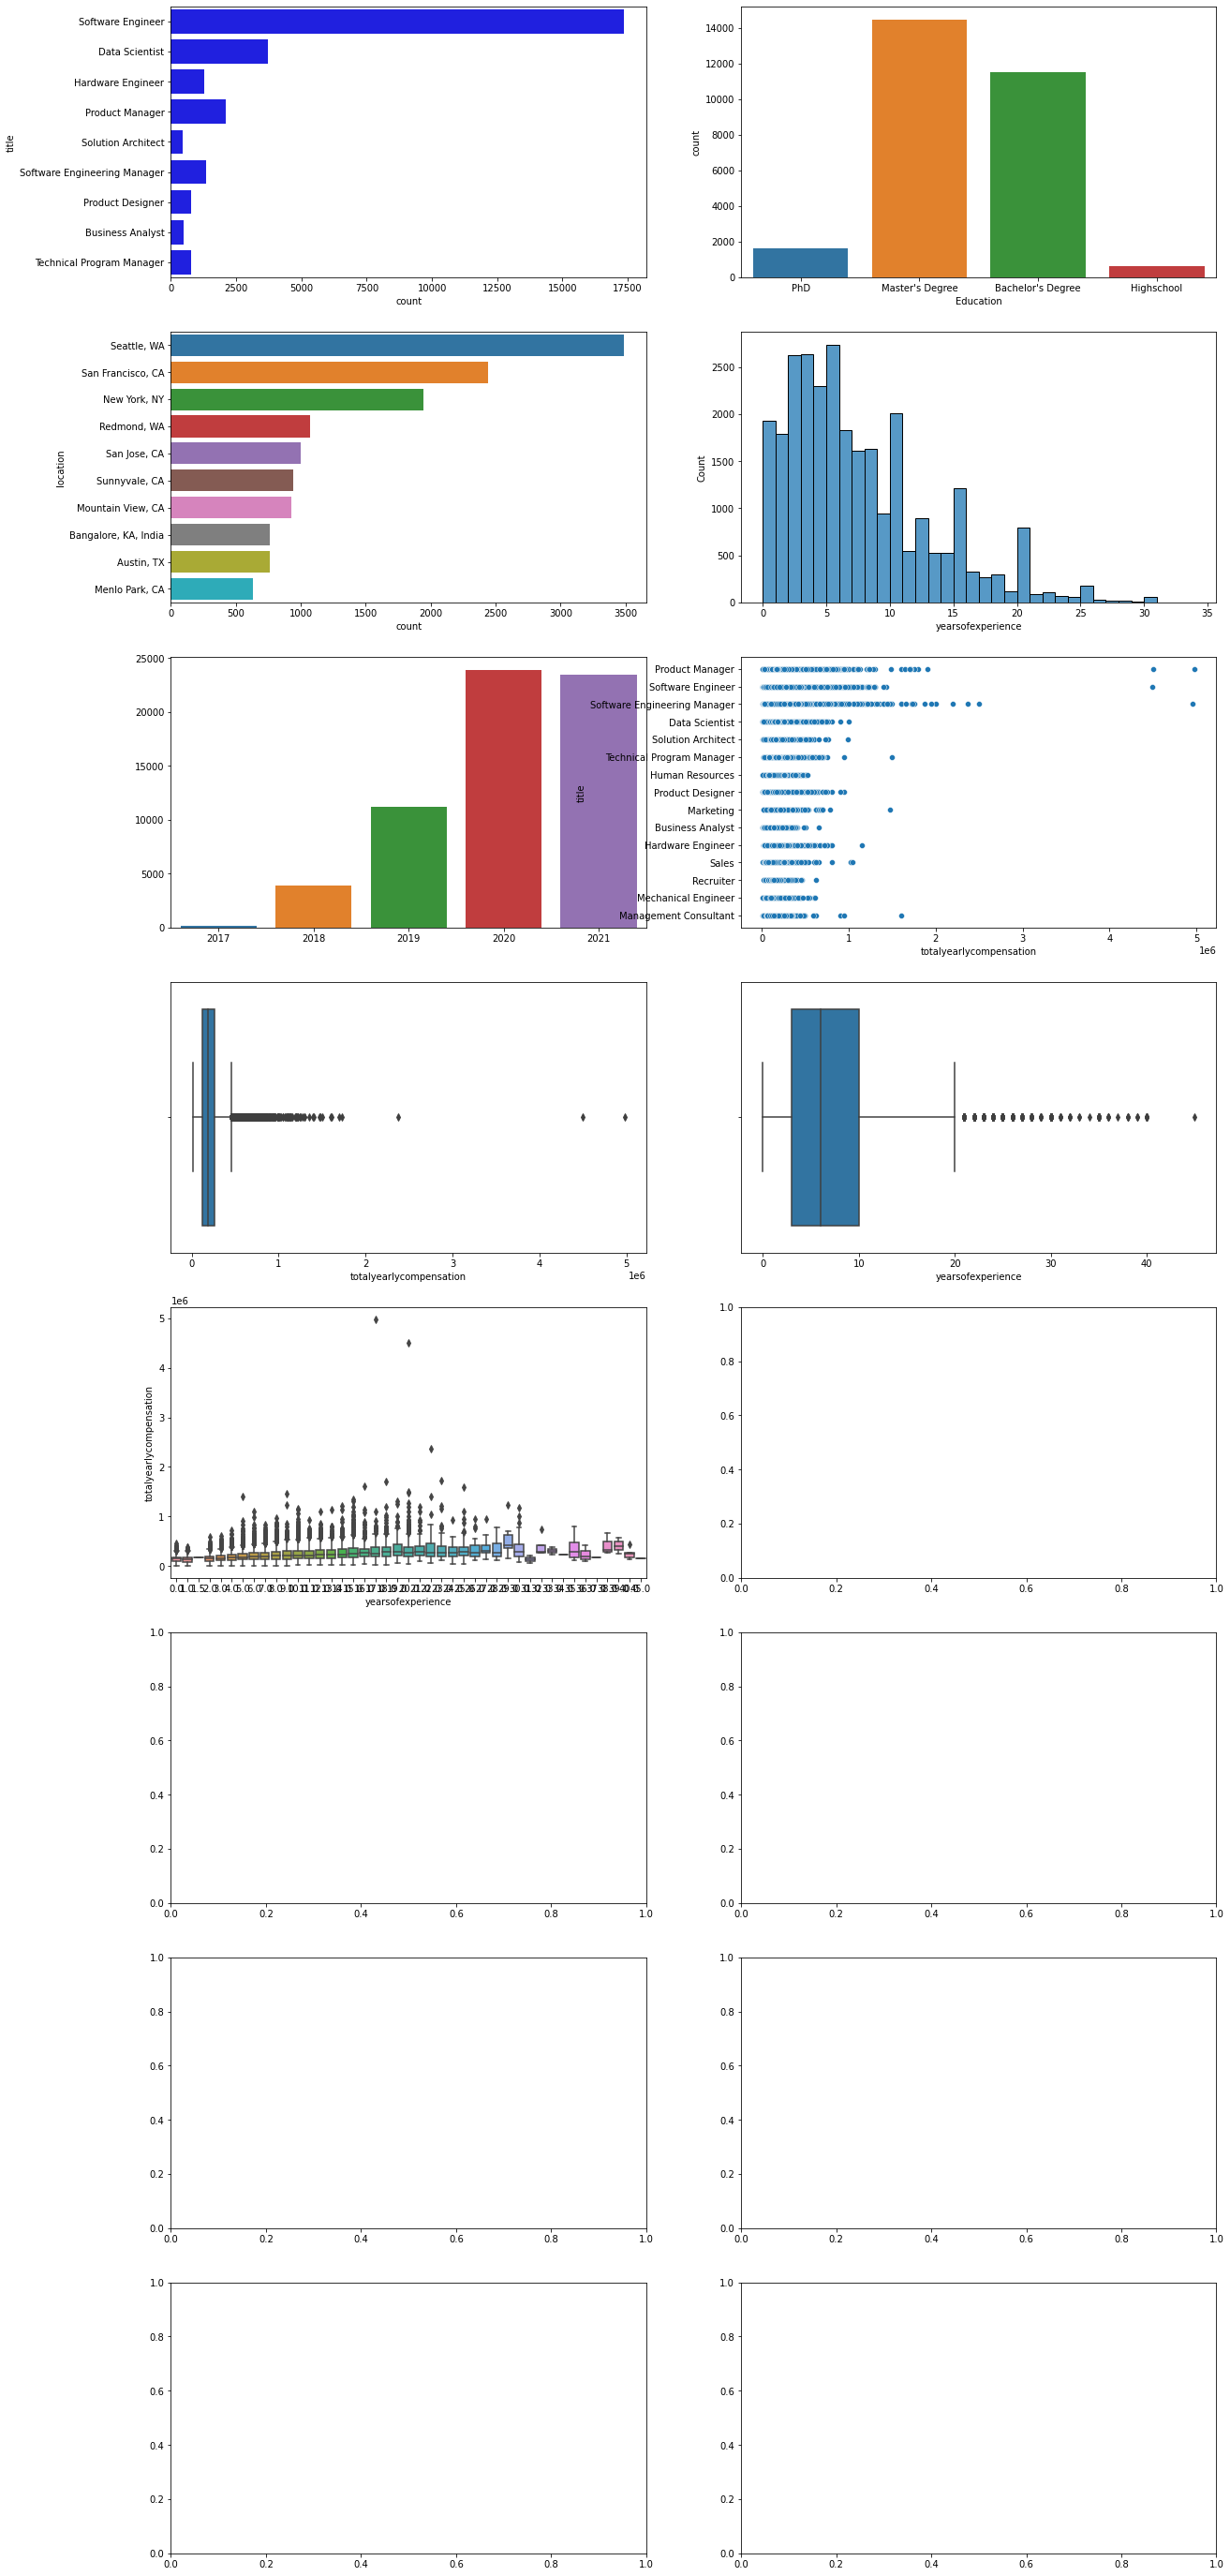

In [32]:
descriptive_analysis(sal_data_cleaned, False)

In [33]:
# create excel writer object
writer = pd.ExcelWriter('SalaryDataCleaned.xlsx')
# write dataframe to excel
sal_data_cleaned.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [34]:
sal_data_transform = pd.read_excel("SalaryDataCleaned.xlsx")

In [35]:
def encode_categorical_variables(df, fieldstoencode):
    for field in fieldstoencode:
        print("******Encoding " + field + " ***********")
        le = LabelEncoder()
        sal_data_transform[field]=sal_data_transform[[field]].apply(le.fit_transform)

        le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(le_mapping)
        
fieldstoencode = ["title","Education","company"]
encode_categorical_variables(sal_data_transform, fieldstoencode)

******Encoding title ***********
{'Business Analyst': 0, 'Data Scientist': 1, 'Hardware Engineer': 2, 'Product Designer': 3, 'Product Manager': 4, 'Software Engineer': 5, 'Software Engineering Manager': 6, 'Solution Architect': 7, 'Technical Program Manager': 8}
******Encoding Education ***********
{"Bachelor's Degree": 0, 'Highschool': 1, "Master's Degree": 2, 'PhD': 3}
******Encoding company ***********
{'10X GENOMICS': 0, '23ANDME': 1, '2U': 2, '3M': 3, '7-ELEVEN': 4, '8X8': 5, 'ABB': 6, 'ABBOTT': 7, 'ACCENTURE': 8, 'ACORNS': 9, 'ACQUIA': 10, 'ACTIONIQ': 11, 'ACTIVECAMPAIGN': 12, 'ADDEPAR': 13, 'ADEVINTA': 14, 'ADIDAS': 15, 'ADOBE': 16, 'ADP': 17, 'ADYEN': 18, 'AETNA': 19, 'AFFIRM': 20, 'AFTERPAY': 21, 'AGODA': 22, 'AIG': 23, 'AIRBNB': 24, 'AIRBUS': 25, 'AIRTABLE': 26, 'AIRTEL INDIA': 27, 'AKAMAI': 28, 'AKAMAI TECHNOLOGIES': 29, 'AKUNA CAPITAL': 30, 'ALARM.COM': 31, 'ALASKA AIRLINES': 32, 'ALATION': 33, 'ALBERTSONS': 34, 'ALGOLIA': 35, 'ALIBABA': 36, 'ALIGN TECHNOLOGY': 37, 'ALLIANZ

# **DATA MODELLING**

In [36]:
# Split the dataset into train and test sets

training_data, testing_data = train_test_split(sal_data_transform, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 22612
No. of testing examples: 5654


Generally speaking, best practice is to use only the training set to figure out how to scale / normalize, 
then blindly apply the same transform to the test set.
Example:
scaled_train =  (train - train_mean) / train_std_deviation
scaled_test = (test - train_mean) / train_std_deviation
Ref: https://datascience.stackexchange.com/questions/39932/feature-scaling-both-training-and-test-data

In [37]:
#sal_data_transform_scaled = training_data[['company','title','totalyearlycompensation',
#                                           'yearsofexperience','yearsatcompany','cityid','Education']].copy()
#sal_data_transform_scaled
#sal_data_transform_scaled = RobustScaler().fit_transform(sal_data_transform_scaled)
#sal_data_transform_scaled = pd.DataFrame(sal_data_transform_scaled,
#                                         columns=['Company','Title','TotalYearlyCompensation',
#                                                  'Yearsofexperience','Yearsatcompany','Cityid','Education'])
#sal_data_transform_scaled.describe()

In [38]:
#To be verified - not working
#descriptive_analysis(sal_data_transform_scaled, True)

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.
Ref: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [39]:
#ref : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
#from sklearn.model_selection import StratifiedShuffleSplit
#    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
#    sss.get_n_splits(X,y)
#    print(sss)
#    for train_index, test_index in sss.split(X, y):
#      print("TRAIN:", train_index, "TEST:", test_index)
#      X_train, X_test = X[train_index], X[test_index]
#      y_train, y_test = y[train_index], y[test_index]

In [40]:
# Define a function to set up the data into input and output variables
def data_setter(training_data, targetvariable):
    
    # Create a list of features from the training data to use for modelling
    feature_list = list(training_data.columns.values.tolist())
    #print the list of features
    #print("Features:")
    #print(feature_list)
    feature_list.remove(targetvariable)
    
    # Assign values to X and y variables
    X = training_data[feature_list]
    y = training_data[targetvariable]
    #print(feature_list)

    # Split the training data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Return outputs for use in other functions
    return X, y, X_train, X_test, y_train, y_test    

In [41]:
# Define a function for feature selection
def data_selection(training_data, columnlist):
    #columnlist = ['company','title','totalyearlycompensation','yearsofexperience','yearsatcompany','cityid','Education']
        
    training_data_selected = training_data[columnlist].copy()
    
    # Return outputs for use in other functions
    return training_data_selected

In [42]:
# Define a function for feature scaling    
def data_scale(X_train,X_test):
    
    #Fit scaler of training set
    scaler = RobustScaler().fit(X_train)
    # transform training data
    X_train_scaled = scaler.transform(X_train)
    # transform testing dataabs
    X_test_scaled = scaler.transform(X_test)
    
   # X_train_scaled.describe()
   # X_test_scaled.describe()
    
    # Return outputs for use in other functions
    return X_train_scaled,X_test_scaled

In [43]:
# Define a function for Linear Regression modeling    
def linear_reg(X_train, y_train, X_test, y_test):
    
     # Use Linear Regression as a model
    regressor = LinearRegression()
    # Fit the model
    regressor.fit(X_train, y_train)
    # Make prediction
    y_predict = regressor.predict(X_test)
   
    # The coefficients
    print("Coefficients: \n", regressor.coef_)
   
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predict))
    
      # The Root mean squared error
    print("Root Mean squared error: %.2f" % mean_squared_error(y_test, y_predict, squared=False))

    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_predict))

    # Plot outputs
   # plt.scatter(X_test, y_test, color="black")
   # plt.plot(X_test, y_predict, color="blue", linewidth=3)

    #plt.xticks(())
    #plt.yticks(())

    #plt.show()
    

In [44]:
def PerformLinearModelling(chosen_columns, targetvariable):
#Call a function to set up the data for modeling
        
        training_data_selected = data_selection(training_data,chosen_columns)

        #split the data into test and train
        X, y, X_train, X_test, y_train, y_test = data_setter(training_data_selected,targetvariable)   
    
        #perform scaling
        X_train_scaled,X_test_scaled = data_scale(X_train,X_test)
        #print("*****************X_train_scaled*****************")
        #print(X_train_scaled)
        #print("*****************X_test_scaled*****************")
        #print(X_test_scaled)
        
        #try different models
        print("*****************linear regression*****************")
        print("***************selected columns for modelling*****************")
        print(chosen_columns)
        linear_reg(X_train_scaled, y_train, X_test_scaled, y_test)
        print("\n")

In [45]:
all_columns = ['company','title','totalyearlycompensation','yearsofexperience','yearsatcompany','cityid','Education']
minimal_set = ['Education','yearsofexperience','totalyearlycompensation']
all_columns_binned = ['company','title','totalyearlycompensation_bins','yearsofexperience','yearsatcompany','cityid','Education']     
minimal_set_binned = ['Education','yearsofexperience','totalyearlycompensation_bins']

In [46]:
PerformLinearModelling(all_columns,'totalyearlycompensation')

*****************linear regression*****************
***************selected columns for modelling*****************
['company', 'title', 'totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'cityid', 'Education']
Coefficients: 
 [-13334.43083973  -1263.86219572  70580.68587765 -12942.11143351
  -7708.18566534  38133.59712605]
Mean squared error: 17070213640.95
Root Mean squared error: 130653.03
Coefficient of determination: 0.19




In [47]:
PerformLinearModelling(minimal_set,'totalyearlycompensation')

*****************linear regression*****************
***************selected columns for modelling*****************
['Education', 'yearsofexperience', 'totalyearlycompensation']
Coefficients: 
 [41151.922092   63216.86536197]
Mean squared error: 17401811989.52
Root Mean squared error: 131915.93
Coefficient of determination: 0.17




In [48]:
def logistic_regression(X_train, y_train, X_test, y_test):
    # train a logistic regression model on the training set   
    logreg = LogisticRegression(max_iter=100, multi_class='auto', solver='liblinear')
    logreg.fit(X_train, y_train)
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    # calculate accuracy
    print(metrics.accuracy_score(y_test, y_pred_class))
    
    #print null accuracy
    # examine the class distribution of the testing set (using a Pandas Series method)
    print("null accuracy: ")
    y_test.value_counts()
    
    # print the first 25 true and predicted responses
    #from __future__ import print_function
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    # IMPORTANT: first argument is true values, second argument is predicted values
    print(metrics.confusion_matrix(y_test, y_pred_class))
    print("Classification Report:")
    print(classification_report(y_test, y_pred_class))
    
    #Plot ROC curve
    #fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_class[:,1])
    #auc = metrics.roc_auc_score(y_test, y_pred_class)

    #create ROC curve
    #plt.plot(fpr,tpr,label="AUC="+str(auc))
    #plt.ylabel('True Positive Rate')
    #plt.xlabel('False Positive Rate')
    #plt.legend(loc=4)
    #plt.show()

    #Understanding the important coefficients
    importance = logreg.coef_[0]
    listed = list(range(len(importance)))

    for i,v in enumerate(importance):
        print(i,'_', X_train.columns[i], ':  %0d, Score: %.5f' % (i,v))

    # plot feature importance
    figure(figsize=(15, 8))
    plt.bar([x for x in range(len(importance))], importance)
    plt.xticks(fontsize=8)
    plt.xticks(listed, rotation = 270)
    plt.show()



In [49]:
#!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
def PerformLogisticRegression(chosen_columns, targetvariable):
   training_data_selected = data_selection(training_data,chosen_columns)

   #split the data into test and train
   X, y, X_train, X_test, y_train, y_test = data_setter(training_data_selected,targetvariable)   
  #Oversampling of the data
   print(Counter(y_train))   
   sm = SMOTE(random_state=12)
   X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
   # new class distribution 
   print(Counter(y_train_res))
   print("*****************logistic regression*****************")
   print("***************selected columns for modelling*****************")
   print(chosen_columns)
   logistic_regression(X_train_res, y_train_res, X_test, y_test)
   print("\n")
   

Counter({2: 15169, 1: 2920})
Counter({2: 15169, 1: 15169})
*****************logistic regression*****************
***************selected columns for modelling*****************
['company', 'title', 'totalyearlycompensation_bins', 'yearsofexperience', 'yearsatcompany', 'cityid', 'Education']
0.6977669688260004
null accuracy: 
True: [2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2]
Pred: [1 2 1 2 1 1 2 2 1 1 2 2 2 2 2 2 2 1 2 1 1 1 1 1 2]
[[ 474  240]
 [1127 2682]]
Classification Report:
              precision    recall  f1-score   support

           1       0.30      0.66      0.41       714
           2       0.92      0.70      0.80      3809

    accuracy                           0.70      4523
   macro avg       0.61      0.68      0.60      4523
weighted avg       0.82      0.70      0.74      4523

0 _ company :  0, Score: -0.00096
1 _ title :  1, Score: -0.02979
2 _ yearsofexperience :  2, Score: 0.13217
3 _ yearsatcompany :  3, Score: -0.04556
4 _ cityid :  4, Score: -0.0000

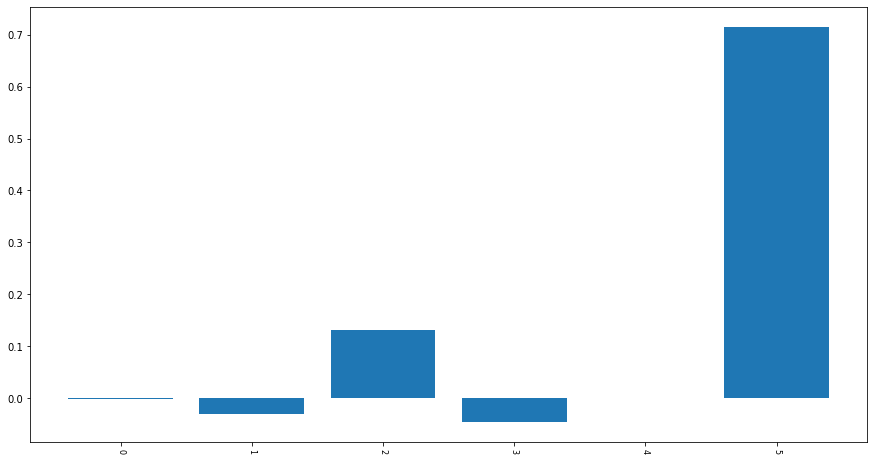

In [50]:
PerformLogisticRegression(all_columns_binned,'totalyearlycompensation_bins')

Counter({2: 15169, 1: 2920})
Counter({2: 15169, 1: 15169})
*****************logistic regression*****************
***************selected columns for modelling*****************
['Education', 'yearsofexperience', 'totalyearlycompensation_bins']
0.6732257351315498
null accuracy: 
True: [2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2]
Pred: [1 2 1 2 1 1 2 2 1 1 2 2 2 1 2 2 1 1 2 1 1 1 1 1 2]
[[ 484  230]
 [1248 2561]]
Classification Report:
              precision    recall  f1-score   support

           1       0.28      0.68      0.40       714
           2       0.92      0.67      0.78      3809

    accuracy                           0.67      4523
   macro avg       0.60      0.68      0.59      4523
weighted avg       0.82      0.67      0.72      4523

0 _ Education :  0, Score: 0.51004
1 _ yearsofexperience :  1, Score: 0.11048


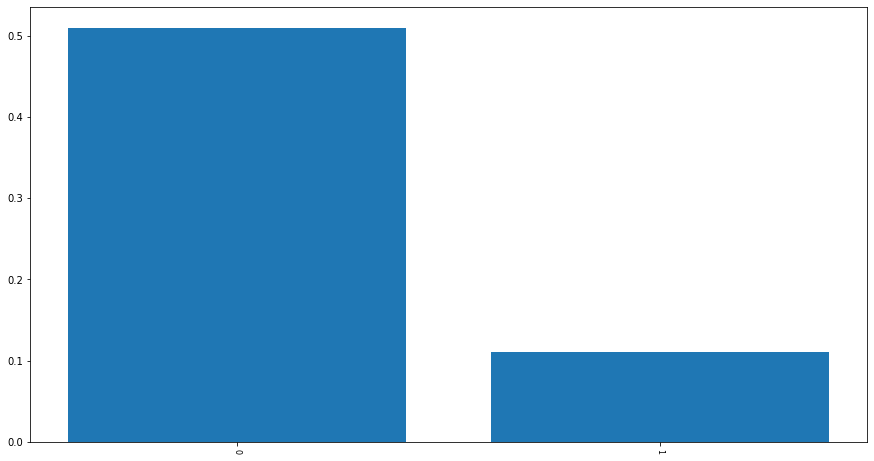

In [51]:
PerformLogisticRegression(minimal_set_binned,'totalyearlycompensation_bins')

In [52]:
def PerformRandomForest(chosen_columns, targetvariable):
   training_data_selected = data_selection(training_data,chosen_columns)

   #split the data into test and train
   X, y, X_train, X_test, y_train, y_test = data_setter(training_data_selected,targetvariable)   
   #Oversampling of the data
   print(Counter(y_train))   
   sm = SMOTE(random_state=12)
   X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
   # new class distribution 
   print(Counter(y_train_res))
   print("*****************Random Forest*****************")
   print("***************selected columns for modelling*****************")
   print(chosen_columns)
   rf = RandomForestClassifier(n_estimators=25, random_state=12)
   rf.fit(X_train_res, y_train_res)
   # make class predictions for the testing set
   y_pred = rf.predict(X_test)
   print('Validation Results')
   print(confusion_matrix(y_test,y_pred))
   print(classification_report(y_test,y_pred))
   print(accuracy_score(y_test, y_pred))
 

In [53]:
PerformRandomForest(all_columns_binned,'totalyearlycompensation_bins')

Counter({2: 15169, 1: 2920})
Counter({2: 15169, 1: 15169})
*****************Random Forest*****************
***************selected columns for modelling*****************
['company', 'title', 'totalyearlycompensation_bins', 'yearsofexperience', 'yearsatcompany', 'cityid', 'Education']
Validation Results
[[ 523  191]
 [ 230 3579]]
              precision    recall  f1-score   support

           1       0.69      0.73      0.71       714
           2       0.95      0.94      0.94      3809

    accuracy                           0.91      4523
   macro avg       0.82      0.84      0.83      4523
weighted avg       0.91      0.91      0.91      4523

0.9069201857174441


In [54]:
PerformRandomForest(minimal_set_binned,'totalyearlycompensation_bins')

Counter({2: 15169, 1: 2920})
Counter({2: 15169, 1: 15169})
*****************Random Forest*****************
***************selected columns for modelling*****************
['Education', 'yearsofexperience', 'totalyearlycompensation_bins']
Validation Results
[[ 492  222]
 [1339 2470]]
              precision    recall  f1-score   support

           1       0.27      0.69      0.39       714
           2       0.92      0.65      0.76      3809

    accuracy                           0.65      4523
   macro avg       0.59      0.67      0.57      4523
weighted avg       0.82      0.65      0.70      4523

0.6548750829095733
